

---



<center>
  <b><font size="+3">IPL Match Outcome Prediction</font></b>
</center>




---



# (1) Importing the necessary libraries for the following :
- File uploads
- Data manipulation
- Data splitting
- Preprocessing
- Model building
- Accuracy evaluation.


In [1]:
# %pip install -r requirements.txt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%pip install xgboost
import xgboost as xgb
# from google.colab import files

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 3.9/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 5.2/124.9 MB 7.6 MB/s eta 0:00:16
   - -------------------------------------- 5.8/124.9 MB 6.5 MB/s eta 0:00:19
   -- ------------------------------------- 6.6/124.9 MB 5.8 MB/s eta 0:00:21
   -- ------------------------------------- 7.3/124.9 MB 5.5 MB/s eta 0:00:22
   -- ------------------------------------- 8.4/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 9.7/124.9 MB 5.3 MB/s eta 0:00:22
   --- ------------------------------------ 11.0/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 12.3/124.9 MB 5.6 MB/s eta 0:00:21
   ---- ----------------------------------- 13.9/124.9 MB 5.7 MB/s eta 0:00:20
   ----- ---------------------------------- 15.7/124.9 MB 5.9 MB/s 



---



# (2) Uploading and reading the dataset :
- Uploading the csv file and then loading it into a dataframe.
- Displaying the first few rows.

In [2]:
# uploaded = files.upload()
df = pd.read_csv('data/Player_match.csv', low_memory=False, encoding='latin-1')
df.head()

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,...,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1.000000e+00,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12694,3.359870e+10,335987,6,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,...,2008.0,0.0,35.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12695,3.359870e+10,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,...,2008.0,0.0,30.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12696,3.359870e+10,335987,8,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India,Player,...,2008.0,0.0,20.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12697,3.359870e+10,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,...,2008.0,0.0,33.0,0.0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha




---



# (3) Pre-processing the dataset.
1.   **Dropping irrelevant rows and columns** that do not contribute to the model.
2.  **Encoding categorical variables**
3. **Defining features and target**
4. **Splitting the data** into train data and test data in the 8:2 ratio.
5. **Standardising the dataset**: After this step, the features will have a mean of 0 and a standard deviation of 1.






In [3]:
df = df[1:]

df_clean = df.drop(['Player_Id', 'DOB', 'PlayerMatch_key', 'Batting_Status', 'Bowling_Status', 'Country_Name', 'Match_Id', 'Player_match_SK', 'is_manofThematch','Season_year'], axis=1)

label_encoders = {}
for column in ['Batting_hand', 'Player_Name', 'Bowling_skill', 'Role_Desc', 'Player_team', 'Opposit_Team',
               'Player_Captain', 'Opposit_captain', 'Player_keeper', 'Opposit_keeper']:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column].astype(str))
    label_encoders[column] = le 

print(df_clean.head())


   Player_Name  Batting_hand  Bowling_skill  Role_Desc  Player_team  \
1          331             1             12          0           11   
2          479             1             12          3           11   
3          467             1              9          3           11   
4          186             1              8          3           11   
5          101             1              5          3           11   

   Opposit_Team  Age_As_on_match  IsPlayers_Team_won  Player_Captain  \
1             6             35.0                 0.0              28   
2             6             30.0                 0.0              28   
3             6             20.0                 0.0              28   
4             6             33.0                 0.0              28   
5             6             25.0                 0.0              28   

   Opposit_captain  Player_keeper  Opposit_keeper  
1               32             28              44  
2               32             28   

In [4]:
value_counts = print(df_clean['IsPlayers_Team_won'].value_counts())


IsPlayers_Team_won
0.0    7040
1.0    6952
Name: count, dtype: int64


C:\Users\risha\AppData\Local\Temp\ipykernel_57716\3167918850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


Text(0, 0.5, 'Count')

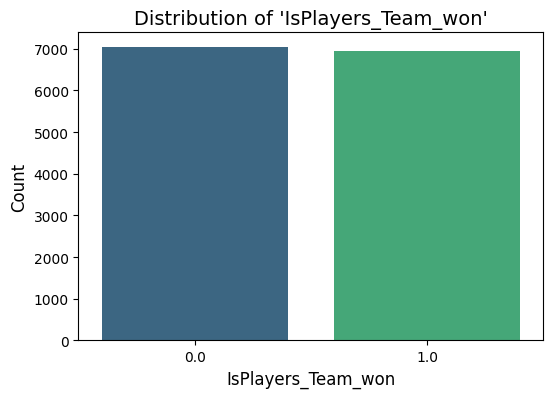

In [5]:
value_counts = df_clean['IsPlayers_Team_won'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

plt.title("Distribution of 'IsPlayers_Team_won'", fontsize=14)
plt.xlabel("IsPlayers_Team_won", fontsize=12)
plt.ylabel("Count", fontsize=12)

In [6]:

X = df_clean.drop(df_clean.columns[7], axis=1)  

y = df_clean.iloc[:, 7]  

In [7]:

print("Shape of X (features):", X.shape)  
print("Shape of y (target):", y.shape)    

print("\nFirst 5 rows of X (features):")
print(X.head()) 

print("\nFirst 5 values of y (target):")
print(y.head())


Shape of X (features): (13992, 11)
Shape of y (target): (13992,)

First 5 rows of X (features):
   Player_Name  Batting_hand  Bowling_skill  Role_Desc  Player_team  \
1          331             1             12          0           11   
2          479             1             12          3           11   
3          467             1              9          3           11   
4          186             1              8          3           11   
5          101             1              5          3           11   

   Opposit_Team  Age_As_on_match  Player_Captain  Opposit_captain  \
1             6             35.0              28               32   
2             6             30.0              28               32   
3             6             20.0              28               32   
4             6             33.0              28               32   
5             6             25.0              28               32   

   Player_keeper  Opposit_keeper  
1             28           

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
print("Processed features data: \n", X_train_scaled[:5, :])
print("Processed target data: \n", X_test_scaled[:5, :])

Processed features data: 
 [[-0.43596062  0.5426987  -2.38796901  0.39166883  0.82529008 -0.48444305
  -0.69415325  1.12085429  1.27552464  1.2326253   1.55973994]
 [-0.70474409  0.5426987   0.62083089  0.39166883 -0.49126426  0.04599188
  -0.69415325 -0.7142838  -0.80118033  1.55582182  0.91471184]
 [ 0.83015097  0.5426987   0.62083089  0.39166883 -1.54450773 -0.48444305
   0.34861381  0.16339094 -0.32194072  0.18223658 -0.69785839]
 [-0.06815167  0.5426987   0.62083089  0.39166883 -1.54450773  0.04599188
  -0.48559984  0.16339094  0.6365385   0.18223658  1.55973994]
 [ 1.48796314  0.5426987  -0.47327817  0.39166883 -1.017886   -0.48444305
  -0.69415325 -0.87386102 -1.83953282  0.50543311 -1.90728606]]
Processed target data: 
 [[ 0.32795028  0.5426987   0.62083089  0.39166883  0.03535748  0.31120935
   0.76572063  0.64212262  1.03590484  1.55582182 -1.74602904]
 [ 0.07331331  0.5426987  -0.1997509   0.39166883  1.35191182 -1.54531292
  -1.5283669  -1.91111299  0.15729889  0.90942877  



---



# (4) Model Selection:

1. **Models Considered**:
   - Logistic Regression
   - Random Forest
   - Support Vector Machine
   - Neural Network
   - Convolutional Neural Network

2. **Performance Metrics**:
   - Displaying Accuracy, Precision, Recall and F1-score for the training and the test dataset for each model.

4. **Visualizations**:
   - Plotting Confusion Matrix for all the models to visualize their performance.

5. **Selected Model**:
   - Will be choosing the model that is best performing in terms of the above stated performance metrics.



---



## <b> A. Logistic Regression :</b>

In [10]:
def create_tf_model():
    model = Sequential([
        Dense(1, input_shape=(X_train_scaled.shape[1],), activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tf_model = create_tf_model()
history = tf_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)


C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
y_train_pred_tf = (tf_model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred_tf = (tf_model.predict(X_test_scaled) > 0.5).astype("int32")

print("TensorFlow Training Accuracy:", accuracy_score(y_train, y_train_pred_tf) * 100)
print("TensorFlow Testing Accuracy:", accuracy_score(y_test, y_test_pred_tf) * 100)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
TensorFlow Training Accuracy: 51.4339319217368
TensorFlow Testing Accuracy: 51.982851018220785


In [12]:
print("TensorFlow Classification Report (Train Data):")
print(classification_report(y_train, y_train_pred_tf))

print("TensorFlow Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred_tf))

TensorFlow Classification Report (Train Data):
              precision    recall  f1-score   support

         0.0       0.51      0.54      0.53      5602
         1.0       0.51      0.49      0.50      5591

    accuracy                           0.51     11193
   macro avg       0.51      0.51      0.51     11193
weighted avg       0.51      0.51      0.51     11193

TensorFlow Classification Report (Test Data):
              precision    recall  f1-score   support

         0.0       0.53      0.54      0.53      1438
         1.0       0.51      0.50      0.50      1361

    accuracy                           0.52      2799
   macro avg       0.52      0.52      0.52      2799
weighted avg       0.52      0.52      0.52      2799



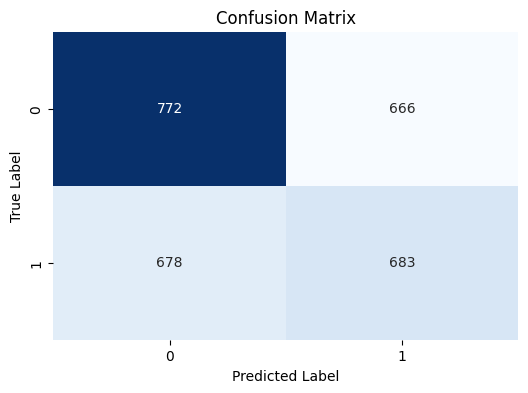

In [13]:
cm = confusion_matrix(y_test, y_test_pred_tf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## <b> B. Logistic Regression (with polynomial features) :</b>

In [14]:

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = Sequential([
    Dense(1, input_shape=(X_train_poly.shape[1],), activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train_poly, y_train,
                    epochs=150,             
                    batch_size=32,     
                    validation_data=(X_test_poly, y_test), 
                    verbose=1)              

y_train_pred = (model.predict(X_train_poly) > 0.5).astype("int32")  
y_test_pred = (model.predict(X_test_poly) > 0.5).astype("int32")



C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4943 - loss: 1.0408 - val_accuracy: 0.4934 - val_loss: 0.9744
Epoch 2/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4963 - loss: 0.9597 - val_accuracy: 0.4998 - val_loss: 0.9164
Epoch 3/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5068 - loss: 0.9014 - val_accuracy: 0.4970 - val_loss: 0.8779
Epoch 4/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5025 - loss: 0.8742 - val_accuracy: 0.5013 - val_loss: 0.8482
Epoch 5/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5128 - loss: 0.8300 - val_accuracy: 0.5016 - val_loss: 0.8235
Epoch 6/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5211 - loss: 0.8059 - val_accuracy: 0.5063 - val_loss: 0.8022
Epoch 7/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5209 - loss: 0.7906 - val_accuracy: 0.5141 - val_loss: 0.7840
Epoch 8/150
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5302 - loss: 0.7667 - val_accu

In [15]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)

print("Training Precision:", precision_score(y_train, y_train_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))

print("Training Recall:", recall_score(y_train, y_train_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))

print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Testing F1 Score:", f1_score(y_test, y_test_pred))

Training Accuracy: 61.72607879924953
Testing Accuracy: 58.44944623079671
Training Precision: 0.6147497805092186
Testing Precision: 0.5711206896551724
Training Recall: 0.6261849400822751
Testing Recall: 0.5841293166789125
Training F1 Score: 0.620414673046252
Testing F1 Score: 0.5775517617144933


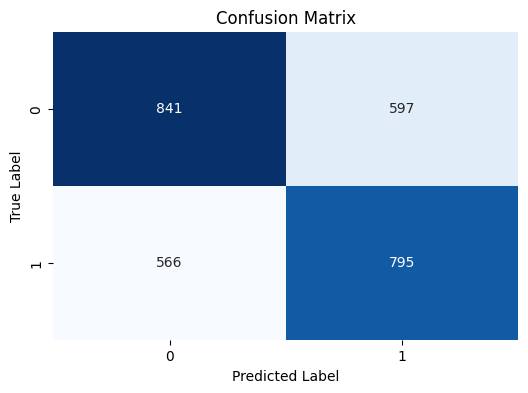

In [16]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**`Remark:`** The results obtained even after proper hyperparameter tuning and using polynomial features fail to provide acceptable train and test accuracies. This shows that the logistic regression is not suitable for the task.



---



## <b> C. Support Vector Machine :</b>

In [17]:

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

In [18]:

y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)

print("Training Precision:", precision_score(y_train, y_train_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))

print("Training Recall:", recall_score(y_train, y_train_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))

print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Testing F1 Score:", f1_score(y_test, y_test_pred))

Training Accuracy: 50.906816760475294
Testing Accuracy: 52.69739192568774
Training Precision: 0.5094191522762951
Testing Precision: 0.5146476642913698
Training Recall: 0.4643176533714899
Testing Recall: 0.4775900073475386
Training F1 Score: 0.48582389819406757
Testing F1 Score: 0.4954268292682927


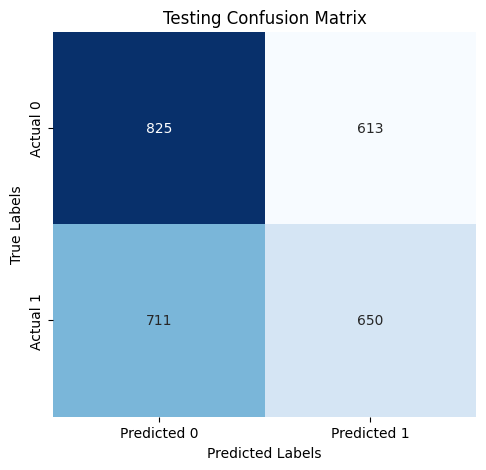

In [19]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix, title='Testing Confusion Matrix')



---



## <b> D. Support Vector Machine (after hyperparameter-tuning) :</b>

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))

svm_pipeline.fit(X_train_poly, y_train)

y_train_pred = svm_pipeline.predict(X_train_poly)
y_test_pred = svm_pipeline.predict(X_test_poly)

In [26]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)

print("Training Precision:", precision_score(y_train, y_train_pred))
print("Testing Precision:", precision_score(y_test, y_test_pred))

print("Training Recall:", recall_score(y_train, y_train_pred))
print("Testing Recall:", recall_score(y_test, y_test_pred))

print("Training F1 Score:", f1_score(y_train, y_train_pred))
print("Testing F1 Score:", f1_score(y_test, y_test_pred))


Training Accuracy: 71.8395425712499
Testing Accuracy: 59.163987138263664
Training Precision: 0.7118290776446066
Testing Precision: 0.5784172661870504
Training Recall: 0.7329636916472902
Testing Recall: 0.5907421013960323
Training F1 Score: 0.7222418047232992
Testing F1 Score: 0.5845147219193021


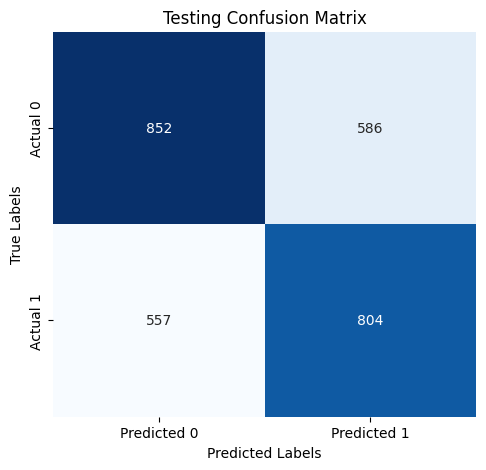

In [28]:

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix, title='Testing Confusion Matrix')

**`Remark:`** The results obtained using SVM even after proper hyperparameter tuning and using polynomial features fail to provide acceptable train and test accuracies. SVM does not appear fit for the task.



---



## <b>E. Random Forest :</b>

In [29]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Classification Report:")
print(train_report)

print("Testing Classification Report:")
print(test_report)

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      5602
         1.0       0.94      0.93      0.93      5591

    accuracy                           0.93     11193
   macro avg       0.93      0.93      0.93     11193
weighted avg       0.93      0.93      0.93     11193

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1438
         1.0       0.78      0.79      0.78      1361

    accuracy                           0.79      2799
   macro avg       0.79      0.79      0.79      2799
weighted avg       0.79      0.79      0.79      2799



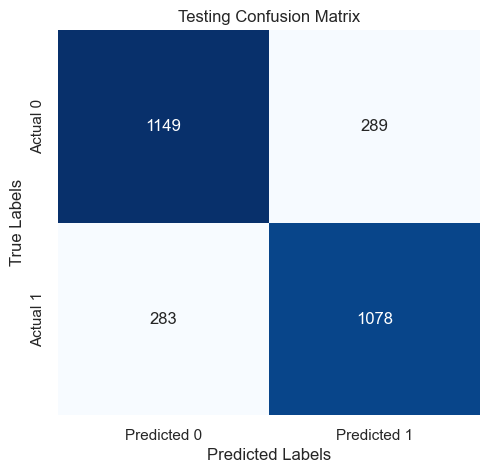

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_test_pred)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plot_confusion_matrix(confusion_matrix, title='Testing Confusion Matrix')

**`Remark:`** The results obtained after proper hyperparameter tuning appear to be better than earlier models but the a better setting still seems to be required.







---



## **<b>F. XGBoost : </b>**

In [31]:
xgboost_model = xgb.XGBClassifier(random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

y_train_pred_xgb = xgboost_model.predict(X_train_scaled)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)

y_pred_xgb = xgboost_model.predict(X_test_scaled)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"Train Accuracy with XGBoost: {train_accuracy_xgb * 100:.2f}%")
print(f"Test Accuracy with XGBoost: {test_accuracy_xgb * 100:.2f}%")

print("\nClassification Report on Train Data:")
print(classification_report(y_test, y_pred_xgb))

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_xgb))

Train Accuracy with XGBoost: 89.40%
Test Accuracy with XGBoost: 83.96%

Classification Report on Train Data:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1438
         1.0       0.83      0.85      0.84      1361

    accuracy                           0.84      2799
   macro avg       0.84      0.84      0.84      2799
weighted avg       0.84      0.84      0.84      2799


Classification Report on Test Data:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1438
         1.0       0.83      0.85      0.84      1361

    accuracy                           0.84      2799
   macro avg       0.84      0.84      0.84      2799
weighted avg       0.84      0.84      0.84      2799



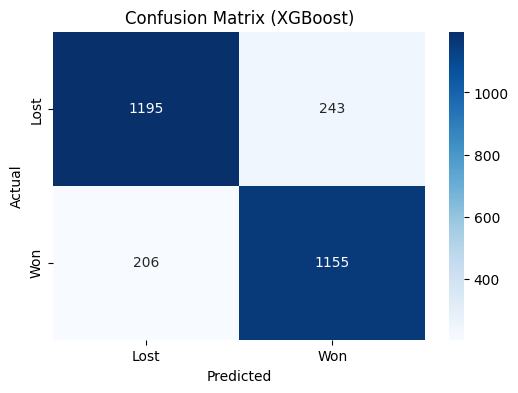

In [34]:
from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**`Remark:`** The results obtained using XGBoost appear to be decent. More exploration can be done to find out a better suited model.



---



## <b>G. Artifical Neural Network : </b>

In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(Dense(512, activation='relu')) 
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(128, activation='relu')) 
    model.add(Dense(64, activation='relu'))  
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


ann_model = create_model()
history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)
y_train_pred = (ann_model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5041 - loss: 0.6954 - val_accuracy: 0.5266 - val_loss: 0.6927
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5315 - loss: 0.6907 - val_accuracy: 0.5459 - val_loss: 0.6971
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5616 - loss: 0.6790 - val_accuracy: 0.5927 - val_loss: 0.6667
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6059 - loss: 0.6534 - val_accuracy: 0.6116 - val_loss: 0.6586
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6356 - loss: 0.6300 - val_accuracy: 0.6302 - val_loss: 0.6283
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6781 - loss: 0.5912 - val_accuracy: 0.6888 - val_loss: 0.5850
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7087 - loss: 0.5502 - val_accuracy: 0.7074 - val_loss: 0.5701
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7386 - loss: 0.5

In [35]:
y_train_pred = (ann_model.predict(X_train_scaled) > 0.5).astype("int32")
y_test_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

print("Training Accuracy:", accuracy_score(y_train, y_train_pred) * 100)
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred) * 100)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training Accuracy: 88.20691503618333
Testing Accuracy: 79.63558413719186


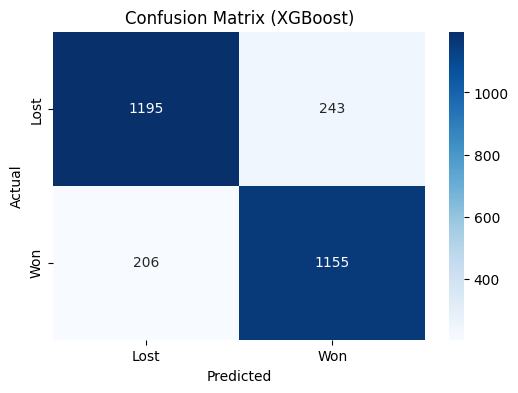

In [36]:

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**`Remark:`** The results obtained using ANN appear to be decent and acceptable.



---



## <b>G. Convolutional Neural Network : </b>

In [39]:
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1))) 
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(Conv1D(256, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model()
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

C:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.5007 - loss: 0.7356 - val_accuracy: 0.5277 - val_loss: 0.6898
Epoch 2/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5405 - loss: 0.6885 - val_accuracy: 0.5459 - val_loss: 0.6816
Epoch 3/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5532 - loss: 0.6807 - val_accuracy: 0.5763 - val_loss: 0.6727
Epoch 4/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5797 - loss: 0.6703 - val_accuracy: 0.5974 - val_loss: 0.6543
Epoch 5/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6088 - loss: 0.6516 - val_accuracy: 0.6091 - val_loss: 0.6428
Epoch 6/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6381 - loss: 0.6250 - val_accuracy: 0.6413 - val_loss: 0.6212
Epoch 7/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6659 - loss: 0.5977 - val_accuracy: 0.6720 - val_loss: 0.5879
Epoch 8/100
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6928 - loss: 0.563

In [40]:
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)

y_train_pred = (cnn_model.predict(X_train) > 0.5).astype("int32")
y_test_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_confusion = confusion_matrix(y_train, y_train_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy * 100)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)
print("Training Confusion Matrix:\n", train_confusion)

print("\nTesting Loss:", test_loss)
print("Testing Accuracy:", test_accuracy * 100)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)
print("Testing Confusion Matrix:\n", test_confusion)

350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training Loss: 0.20843058824539185
Training Accuracy: 88.78763318061829
Training Precision: 0.8964886613021215
Training Recall: 0.8767662314433912
Training F1 Score: 0.8865177683334841
Training Confusion Matrix:
 [[5036  566]
 [ 689 4902]]

Testing Loss: 0.5028479099273682
Testing Accuracy: 79.5641303062439
Testing Precision: 0.7885881492318947
Testing Recall: 0.7920646583394563
Testing F1 Score: 0.7903225806451613
Testing Confusion Matrix:
 [[1149  289]
 [ 283 1078]]


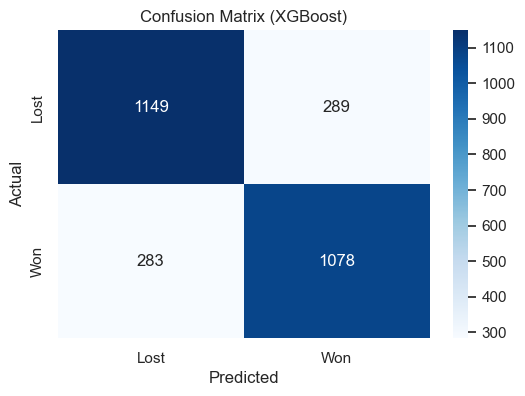

In [41]:
cm_xgb = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**`Remark:`** The results obtained using CNN appear to be decent and acceptable. The obtained results suggest that the model is neither overfit nor underfit. Therefore, can be chosen for the task.



---







# **5. Visualization of the obtained results:**

## ***Plotting to depict the importance given by the chosen model to each feature.***

C:\Users\risha\AppData\Local\Temp\ipykernel_57716\22788063.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=['#FF8C00']*len(feature_importance_df))


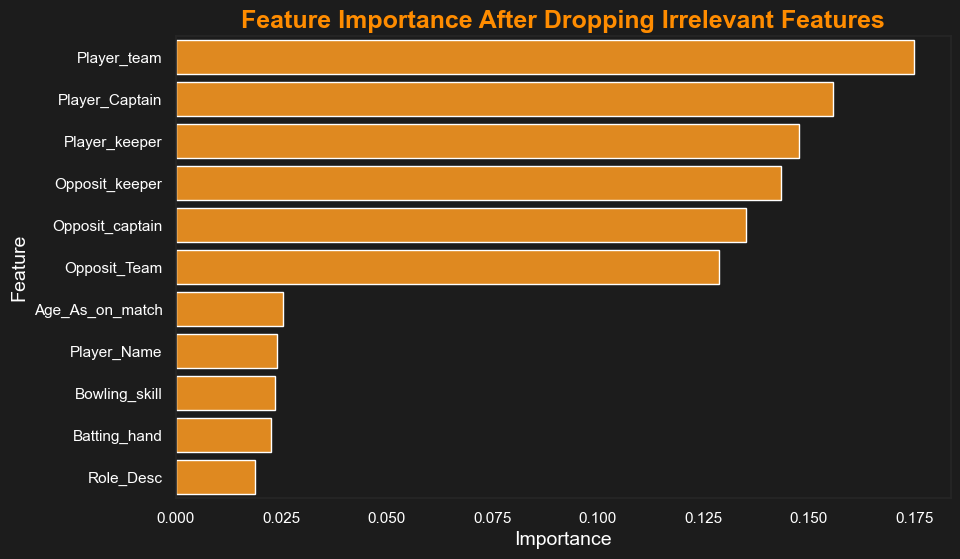

In [37]:
importances = xgboost_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.set(style="white")

barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=['#FF8C00']*len(feature_importance_df))

barplot.set_facecolor('#1c1c1c') 
plt.gcf().set_facecolor('#1c1c1c')

plt.title('Feature Importance After Dropping Irrelevant Features', fontsize=18, color='#FF8C00', weight='bold')
plt.xlabel('Importance', fontsize=14, color='white')
plt.ylabel('Feature', fontsize=14, color='white')

barplot.tick_params(axis='x', colors='white')
barplot.tick_params(axis='y', colors='white')

barplot.grid(False)

plt.show()

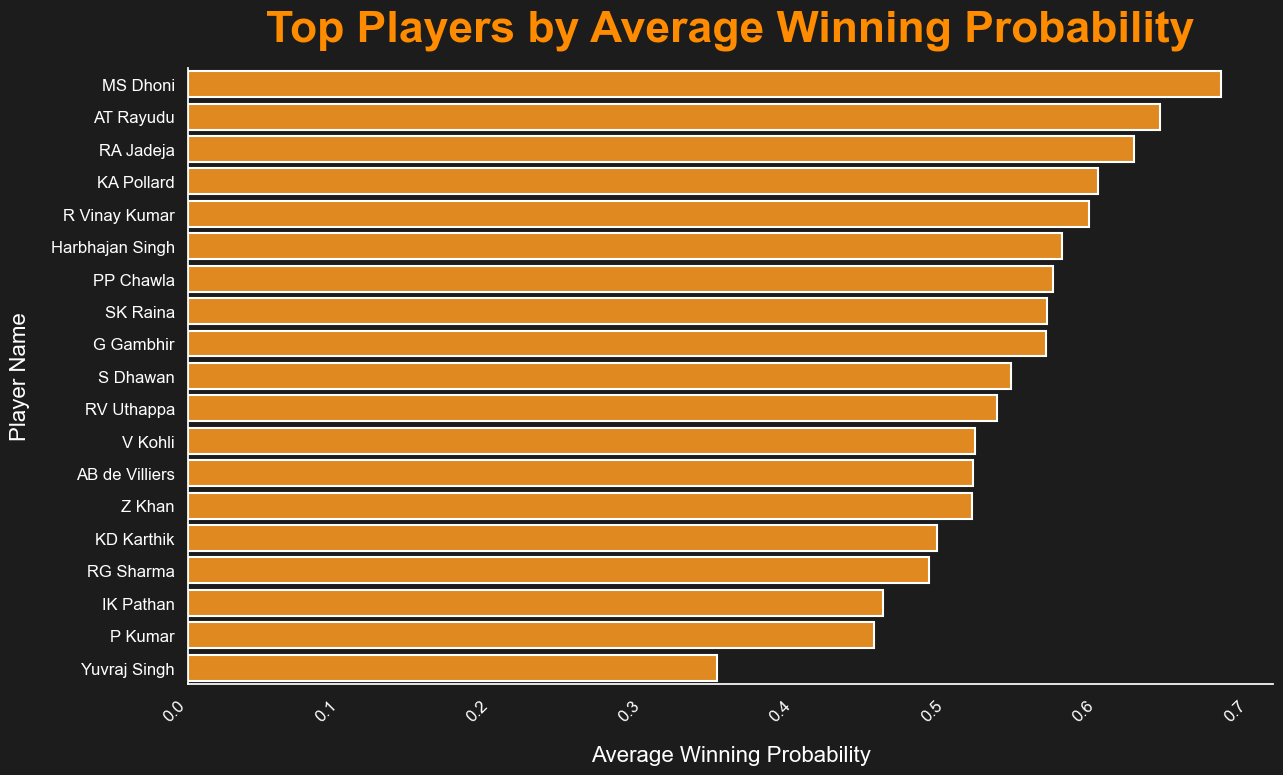

In [38]:
player_names_encoded = X_test['Player_Name'].values 

winning_probabilities = xgboost_model.predict_proba(X_test_scaled)[:, 1]

probability_df = pd.DataFrame({
    'Player_Name_Encoded': player_names_encoded,
    'Winning_Probability': winning_probabilities
})

player_name_decoder = label_encoders['Player_Name']
probability_df['Player_Name'] = player_name_decoder.inverse_transform(probability_df['Player_Name_Encoded'])

player_match_counts = probability_df.groupby('Player_Name').size().reset_index(name='Match_Count')

players_with_30_matches = player_match_counts[player_match_counts['Match_Count'] >= 25]

filtered_probability_df = pd.merge(probability_df, players_with_30_matches, on='Player_Name')

avg_prob_per_player = filtered_probability_df.groupby('Player_Name')['Winning_Probability'].mean().reset_index()

avg_prob_per_player = avg_prob_per_player.sort_values(by='Winning_Probability', ascending=False)

avg_prob_per_player['Rank'] = avg_prob_per_player['Winning_Probability'].rank(method='first', ascending=False)

top_50_players = avg_prob_per_player.head(50)

plt.figure(figsize=(14, 8))
sns.set(style="white")

barplot = sns.barplot(x='Winning_Probability', y='Player_Name', data=top_50_players, color='#FF8C00')


plt.gcf().set_facecolor('#1c1c1c') 
barplot.set_facecolor('#1c1c1c') 

plt.title('Top Players by Average Winning Probability', fontsize=32, color='#FF8C00', weight='bold', pad=20)
plt.xlabel('Average Winning Probability', fontsize=16, color='white', labelpad=15)
plt.ylabel('Player Name', fontsize=16, color='white', labelpad=15)

barplot.tick_params(axis='x', colors='white', labelsize=12)
barplot.tick_params(axis='y', colors='white', labelsize=12)

plt.xticks(rotation=45, ha='right')

barplot.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')

for bar in barplot.patches:
    bar.set_edgecolor('white')
    bar.set_linewidth(1.5)

plt.show()